In [ ]:
! pip install -q scikit-learn matplotlib seaborn

In [6]:
! pip install -q numpy pandas

In [7]:
! pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


## Load the Dataset

In [2]:
import pandas as pd

# Loading the dataset
data = pd.read_csv("Tweets.csv", encoding="latin-1", header=None)

# Assigning column names
data.columns = ["sentiment", "id", "date", "query", "user", "text"]

# Using only the relevant columns
data = data[["sentiment", "text"]]

# Converting labels: 0 = negative, 4 = positive
data["sentiment"] = data["sentiment"].replace({0: 0, 4: 1})


## Clean the Dataset

In [8]:
import re

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # URLs
    text = re.sub(r"@\w+", "", text)  # Mentions
    text = re.sub(r"#", "", text)  # Hashtags
    text = re.sub(r"[^\w\s]", "", text)  # Special characters
    return text.lower()

data["cleaned_text"] = data["text"].apply(clean_text)


## Removing Stopwords

In [9]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk


nltk.download("stopwords")
nltk.download("punkt")

stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

data["processed_text"] = data["cleaned_text"].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\palla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\palla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## EDA

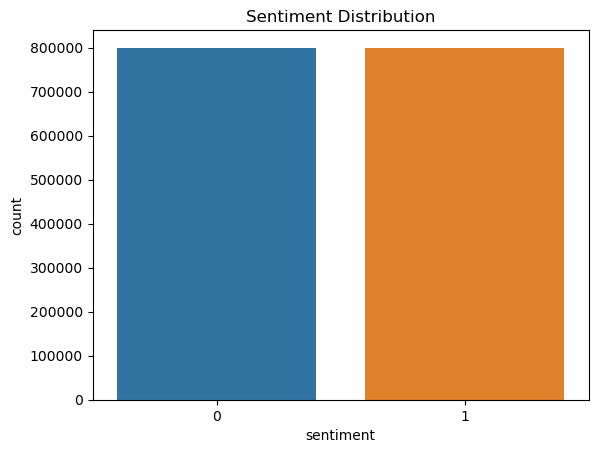

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(x="sentiment", data=data)
plt.title("Sentiment Distribution")
plt.show()


## Feature Extraction 

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
features = vectorizer.fit_transform(data["processed_text"])
X = features.toarray()
y = data["sentiment"].values


## Training

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


              precision    recall  f1-score   support

           0       0.76      0.71      0.74    159494
           1       0.73      0.78      0.76    160506

    accuracy                           0.75    320000
   macro avg       0.75      0.75      0.75    320000
weighted avg       0.75      0.75      0.75    320000



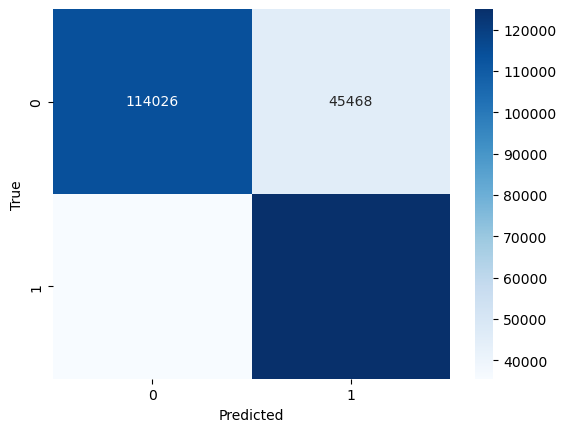

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [15]:


new_tweets = ["I love this!", "This is so bad."]
new_features = vectorizer.transform(new_tweets)
predictions = model.predict(new_features)
print(predictions)

[1 0]


In [18]:
import pickle


# Save the model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save the vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)
